In [1]:
from text_to_places import getLocations, getLabeledEntities, getLatLng
from map_places import getDataFrame, mapCategory, getBoundingBox
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


In [2]:
with open('tale_of_two_cities.txt', encoding='utf-8') as f:
    text = f.read()

['The Shoemaker\n\n\n     Book the Second--the Golden Thread\n\n     Chapter', 'Town\n     Chapter VIII   ', 'Opinion\n     Chapter XX     ', 'Plea\n     Chapter XXI', 'The Sea', '     ', 'Triumph\n     Chapter VII', 'Knock', 'England', 'France', 'England', 'London', 'Westminster', 'America', 'France', 'France', 'Norway', 'Paris', 'England', 'City', 'London', 'London', "St. Giles's"]
1/23 The Shoemaker


     Book the Second--the Golden Thread

     Chapter
2/23 Town
     Chapter VIII   
3/23 Opinion
     Chapter XX     
4/23 Plea
     Chapter XXI
5/23 The Sea
6/23      
7/23 Triumph
     Chapter VII
8/23 Knock
9/23 England
10/23 France
11/23 England
12/23 London
13/23 Westminster
14/23 America
15/23 France
16/23 France
17/23 Norway
18/23 Paris
19/23 England
20/23 City
21/23 London
22/23 London
23/23 St. Giles's
getDataFrame DEPRECATED, use makeDataFrame instead
['Dover', 'Dover', 'Dover', 'Dover', 'Dover', 'Dover', 'gallop', 'Stand', 'Dover', 'Dover']
1/10 Dover
2/10 Dover
3/10 Dover


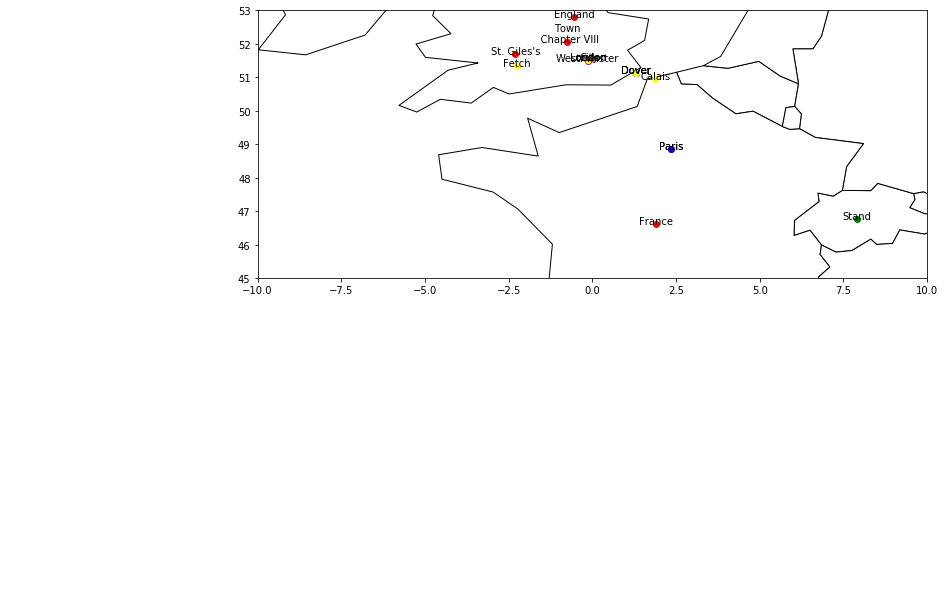

In [3]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
        color='white', edgecolor='black', figsize=(12,12)
    )

colors = ['red', 'green', 'blue', 'yellow']
stride = int(len(text) / 100)
for i in range(4):
    subset = text[i*stride:i*stride+stride]
    locs = getLocations(subset)
    print(locs)
    latLngs = getLatLng(locs)
    gdf = getDataFrame(latLngs)
    
    bbox = getBoundingBox(gdf)
    plt.xlim(bbox['xmin'], bbox['xmax'])
    plt.ylim(bbox['ymin'], bbox['ymax'])
    mapCategory(gdf, ax, colors[i])
    
    
plt.show()

In [ ]:
locs[3].text